# Evaluation Metrics and Scoring

## Metrics For Binary Classification

### Kind of errors

There are two kinds of errors, "type I error" or _false positive_ and "type II error" or _false negative_

### Imbalanced Datasets

Imbalanced Datasets means that the data in one class is dominating the other. Since it's bigger then the model have a great accuracy because it have a small chance to guest the small class than the larger one.

In [2]:
# let's take an example
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

# make the dataset class
# the number 9 only
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0
)

# use dummy classifier with most frequest strategy
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
print("Most frequent accuracy {:.2f}".format(dummy.score(X_test, y_test)))

Most frequent accuracy 0.90


If there is a model with 90% percent of accuracy you might be wander what kind of class it might be predicting, it could be just one class!

In [3]:
# lets compare the dummy with Logistic regression
logreg = LogisticRegression().fit(X_train, y_train)
print("Logistic regression score {:.2f}".format(logreg.score(X_test, y_test)))

Logistic regression score 0.98


### Confusion matrices

one of the most comprehensive way to represent the result of binary classification is using confusion matrices.

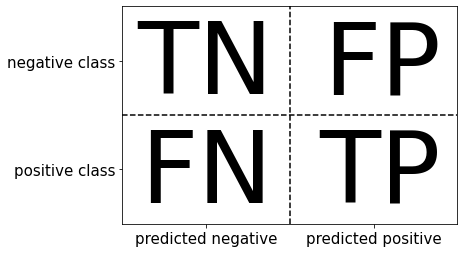

In [4]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [5]:
from sklearn.metrics import confusion_matrix

# get predicition from previous logreg
logreg_pred = logreg.predict(X_test)
# get dummy predicition
dummy_pred = dummy.predict(X_test)
# create our confusion matrix
confusion = confusion_matrix(y_test, logreg_pred)
print("Confusion matrix logreg \n{}".format(confusion))
confusion = confusion_matrix(y_test, dummy_pred)
print("Confusion matrix dummy \n{}".format(confusion))

Confusion matrix logreg 
[[399   4]
 [  7  40]]
Confusion matrix dummy 
[[403   0]
 [ 47   0]]


Relation to accuracy. To calculate the accuracy we can use following equation

$\begin{equation*}
Accuracy = \frac{TP + TN}{TN + FP + TP + FN}
\end{equation*}$

__Precision__ measures how many of samples predicted as positive are actually positive

$
\begin{equation*}
Precision = \frac{TP}{TP + FP}
\end{equation*}
$

the number is to prevent false positive

__Recall__ measures how many of positive samples that are measured as positive

$
\begin{equation*}
Recall = \frac{TP}{TP + FN}
\end{equation*}
$

the number is to prevent false negative

_F-score_ or _F-measure_ calculate the relation of precision and recall

$
\begin{equation*}
F = 2 . \frac{precision.recall}{precision+recall}
\end{equation*}
$

in sklearn this called _F1_ score

In [6]:
# implementing f1 score
from sklearn.metrics import f1_score

print("Most frequent f1       : {:.2f}".format(f1_score(y_test, dummy_pred)))
print("Logistic Regression f1 : {:.2f}".format(f1_score(y_test, logreg_pred)))

Most frequent f1       : 0.00
Logistic Regression f1 : 0.88


In [7]:
# we can use classification report to
# provide the measurements of precision
# recall and f1 score
from sklearn.metrics import classification_report
print("Dummy \n", classification_report(y_test, dummy_pred, target_names=['nine', 'not nine']))
print("Logreg \n", classification_report(y_test, logreg_pred, target_names=['not nine', 'nine']))

Dummy 
               precision    recall  f1-score   support

        nine       0.90      1.00      0.94       403
    not nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

Logreg 
               precision    recall  f1-score   support

    not nine       0.98      0.99      0.99       403
        nine       0.91      0.85      0.88        47

    accuracy                           0.98       450
   macro avg       0.95      0.92      0.93       450
weighted avg       0.98      0.98      0.98       450



### Taking Uncertainty into account

If we handling imbalanced data, we have to keep in mind that our models should be as general as possible.

In [8]:
# tuning our model using decision_function
# or predict_proba method
# make the data first
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=400, centers=2, cluster_std=[7.0, 2],
        random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.5).fit(X_train, y_train)

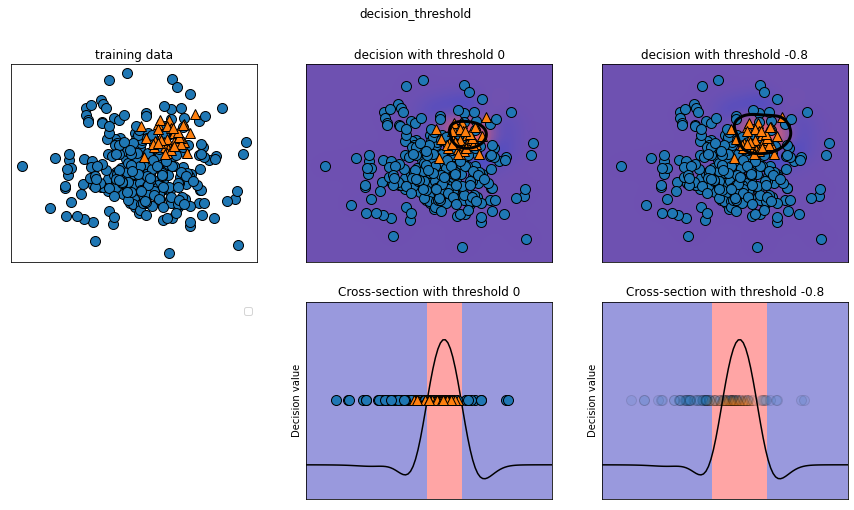

In [9]:
mglearn.plots.plot_decision_threshold()

In [10]:
# evaluate the model
print(classification_report(y_test, svc.predict(X_test)))

precision    recall  f1-score   support

           0       0.93      0.89      0.91        56
           1       0.87      0.91      0.89        44

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [11]:
# we change the value here
# and then the values of first
# class is changed
y_pred_lower_threshold = svc.decision_function(X_test) < -.8
print("\n", classification_report(y_test, y_pred_lower_threshold))


               precision    recall  f1-score   support

           0       0.40      0.52      0.45        56
           1       0.00      0.00      0.00        44

    accuracy                           0.29       100
   macro avg       0.20      0.26      0.22       100
weighted avg       0.22      0.29      0.25       100



the concept of calibration: a calibrated model is a model that provides an accurate
measure of its uncertainty.

### Precision Recall and ROC-curves

Lets say the business goal wants the model have lower than 10% of false positive rate, means 90% of recall. It is possible to get 90% of recall, but keep in mind that 100% of recall is useles.

Text(0, 0.5, 'Recall')

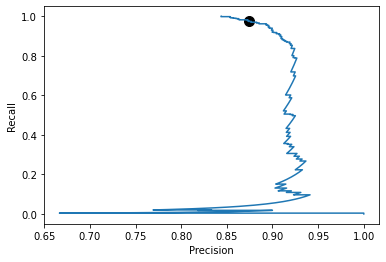

In [12]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=4000, centers=2, cluster_std=[7.0, 2],
                    random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

# apply precision_recall_curve
precision, recall, threshold = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)

# find the zero threshold
zero_threshold = np.argmin(np.abs(threshold))

# plotting the precision, recall and threshold
plt.plot(precision[zero_threshold], recall[zero_threshold], 'o', markersize=10,
        label="threshold zero", c='k')
plt.plot(precision, recall, label="Precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

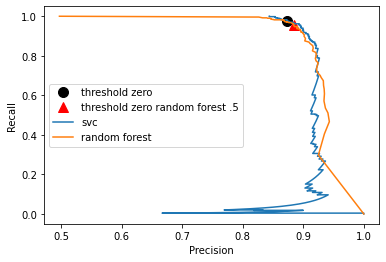

In [13]:
# adding comparison with random forest
from sklearn.ensemble import RandomForestClassifier

X, y = make_blobs(n_samples=4000, centers=2, cluster_std=[7.0, 2],
                    random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
randomForest = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
randomForest.fit(X_train, y_train)

# apply precision_recall_curve
precision, recall, threshold = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)
precision_t, recall_t, threshold_t = precision_recall_curve(
    y_test, randomForest.predict_proba(X_test)[:,1]
)

# find the zero threshold
zero_threshold = np.argmin(np.abs(threshold))
zero_threshold_t = np.argmin(np.abs(threshold_t - .5))

# plotting the precision, recall and threshold
plt.plot(precision[zero_threshold], recall[zero_threshold], 'o', markersize=10,
        label="threshold zero", c='k')
plt.plot(precision_t[zero_threshold_t], recall_t[zero_threshold_t], '^', markersize=10,
        label="threshold zero random forest .5", c='r')
plt.plot(precision, recall, label="svc")
plt.plot(precision_t, recall_t, label="random forest")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()

In [14]:
# compare the random forest f1 with SVM
print("random forest f1: {}".format(f1_score(y_test, randomForest.predict(X_test))))
print("SVM f1: {}".format(f1_score(y_test, svc.predict(X_test))))

random forest f1: 0.9198067632850241
SVM f1: 0.9210275927687915


In [15]:
# we want to summarize the precision recall curve
# using average_precision_score
# passing the predict_proba or decision_function
# instead of predict value
from sklearn.metrics import average_precision_score
randomForest_avg = average_precision_score(y_test, randomForest.predict_proba(X_test)[:,1])
svc_avg = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(randomForest_avg))
print("Average precision of svc: {:.3f}".format(svc_avg))

Average precision of random forest: 0.922
Average precision of svc: 0.914


### Reciever Operating Characteristic (ROC) and AUC

This shows True Positive Rate(TPR) againts False Positive Rate (FPR)

$
\begin{equation*}
FPR = \frac{FP}{FP + TN}
\end{equation*}
$

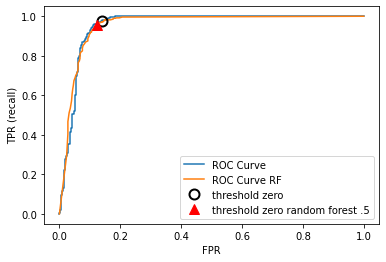

In [16]:
# implementation
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, randomForest.predict_proba(X_test)[:, 1])

# visualizing like before
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
zero_threshold_t = np.argmin(np.abs(thresholds_rf - .5))

plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(fpr_rf[zero_threshold_t], tpr_rf[zero_threshold_t], '^', markersize=10,
        label="threshold zero random forest .5", c='r')
plt.legend(loc=4)


# the ideal curve is high recall and low false positive rate

In [17]:
# compute the roc auc score
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, randomForest.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.954
AUC for SVC: 0.953


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


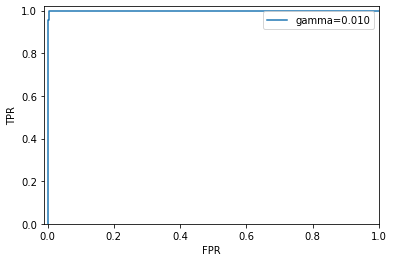

In [18]:
# lets use the first problem data
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
                                digits.data, y, random_state=0)

plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
        gamma, accuracy, auc))

plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

## Metrics for Multiclass Classification

Basically the metrics is derived from binary Classification

In [20]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0
) 

logreg = LogisticRegression().fit(X_train, y_train)

pred = logreg.predict(X_test)

print("Accuracy {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix {}".format(confusion_matrix(y_test, pred)))

Accuracy 0.951
Confusion matrix [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


In [23]:
# print the report
print("\n", classification_report(y_test, pred))


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



The most commonly used metric for imbalanced datasets in the multiclass setting is the multiclass version of _f-score_. It works by computing one of binary f-score per class with the class itself is positive class and the rest are negative class. Then the score are averaged using one of theese strategies:

* "macro" averaging computes the unweighted per-class f-scores. This gives equal
weight to all classes, no matter what their size is.
* "weighted" averaging computes the mean of the per-class f-scores, weighted by
their support. This is what is reported in the classification report.
* "micro" averaging computes the total number of false positives, false negatives,
and true positives over all classes, and then computes precision, recall, and fscore
using these counts.

if the sample equally is main concern use __micro__, if the classes equally is the main concern use __macro__

In [30]:
print("Micro average {}".format(f1_score(y_test, pred, average="micro")))
print("Macro average {}".format(f1_score(y_test, pred, average="macro")))

Micro average 0.9511111111111111
Macro average 0.9518965775741322


## Regression Metrics

It's enough to use $R^2$ or mean absolute error

## Using Evaluation Metrics in Model Selection

In [37]:
from sklearn.model_selection import cross_val_score

# use default scoring
print("Default Scoring {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9, cv=3)
))
# providing explicit accuracy wont change the result
explicit = cross_val_score(SVC(), digits.data, digits.target == 9, cv=3,
            scoring="accuracy")
print("Explicit scoring {}".format(explicit))
# scoring using AUC
auc_score = cross_val_score(SVC(), digits.data, digits.target == 9, cv=3,
            scoring="roc_auc")
print("AUC {}".format(auc_score))

Default Scoring [0.97996661 0.98664441 0.98330551]
Explicit scoring [0.97996661 0.98664441 0.98330551]
AUC [0.99557823 0.99879406 0.98964131]


In [42]:
# we can use these metrics in GridSearch
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0
) 

param_grid = [{'kernel': ['rbf'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

# put the roc_auc param in grid search
grid = GridSearchCV(SVC(), param_grid, scoring="roc_auc", n_jobs=8, verbose=1)
grid.fit(X_train, y_train)

print("Best params {}".format(grid.best_params_))
print("Best cross validation AUC score {:.2f}".format(grid.best_score_))
print("Test AUC score {:.2f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy {:.2f}".format(grid.score(X_test, y_test)))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.6s
Best params {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross validation AUC score 1.00
Test AUC score 1.00
Test set accuracy 1.00
[Parallel(n_jobs=8)]: Done 210 out of 210 | elapsed:    8.2s finished


In [45]:
# the summary of these method
from sklearn.metrics import SCORERS
print("Available scorers\n", sorted(SCORERS.keys()) )

Available scorers
 ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']
